In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mean_01 = np.array([1.0,0.5])
mean_02 = np.array([4.0,5.2])

cov_01 = np.array([[1.0,0.1], [0.1,1.0]])
cov_02 = np.array([[1.0,0.1], [0.1,1.2]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print (dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


In [3]:
rows = dist_01.shape[0]+ dist_02.shape[0]
cols = dist_01.shape[1]+1

data = np.zeros((rows,cols))
print(data.shape) 

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:,-1] += 1.0

print (data.shape)

(1000, 3)
(1000, 3)


In [4]:
np.random.shuffle(data)

print (data[:10])

[[ 0.37743825  0.6612625   0.        ]
 [ 2.07074074  0.45814287  0.        ]
 [ 4.56668021  5.4814592   1.        ]
 [-1.47840693 -0.3438653   0.        ]
 [ 4.27813848  6.58479742  1.        ]
 [ 4.05758384  4.10355081  1.        ]
 [ 1.6167932   0.77437165  0.        ]
 [ 1.93372478  0.40595436  0.        ]
 [ 2.00142748  1.64069181  0.        ]
 [ 4.00618407  5.14474362  1.        ]]


In [5]:
split = int(0.65* data.shape[0])

X_train = data[:split, :2]
X_test = data[split:, :2]

y_train = data[:split, -1]
y_test = data[split:, -1]

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(650, 2) (650,)
(350, 2) (350,)


In [15]:
### Function
def sigmoid(z):
    return 1.0/(1+np.exp(-1*z))

def hypothesis(x, w, b):###writing generic hypthesis..
    h = (x*w).sum() + b # x & w could be arrays..
    return sigmoid(h)

# Binary CrossEntropy :-
def get_error(x, w, y_true, b):
    err = 0.0
    
    m= x.shape[0]
    for ix in range(m):
        if y_true[ix] == 0:
            err+= (np.log(1-hypothesis(x[ix], w, b)))
        else:
            err+= (np.log(hypothesis(x[ix],w,b)))
    err=err/m
    return err  

In [7]:
def get_gradients(x, w, y_true, b):
    grad_w = np.zeros(w.shape[0]) # wrt weight
    grad_b = 0.0 # wrt bias
    
    m = x.shape[0]
    
    for ix in range(m):
        grad_w += (y_true[ix] - hypothesis(x[ix], w, b))*(-1*x[ix])
        grad_b += (y_true[ix] - hypothesis(x[ix], w, b))*(-1)
        
    grad_w = grad_w/m
    grad_b = grad_b/m
    
    return [grad_w, grad_b]

In [8]:
def optimizer(x, w, y_true, b, learning_rate=0.01):
    error = get_error(x,w, y_true,b) #just for plotting purpose
    [grad_w, grad_b] = get_gradients(x, w, y_true, b)
    
    w=w-learning_rate*grad_w
    b=b-learning_rate*grad_b
    
    return error, w, b

In [9]:
def predict(x_sample, w, b):
    conf = hypothesis(x_sample, w, b)
    if conf>0.5:
        return 1
    else:
        return 0

def get_accuracy(x_test, y_test, w ,b):
    y_pred = []
    for ix in range(x_test.shape[0]):
        y_pred.append(predict(x_test[ix], w, b))
    y_pred = np.asarray(y_pred)
    
    return float((y_pred==y_test)).sum()/y_test.shape[0]

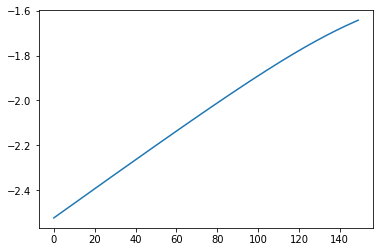

In [17]:
### re write yesterday fn and calculate gd again and again... and keep calculating, and plotting errors..
loss = []
W = np.array([0.5,0.5])
b = 4.21
n_iters = 150
for ix in range(n_iters):

    err, W, b = optimizer(X_train, W, y_train, b, learning_rate=0.01)
    loss.append(err)
    
plt.plot(loss)
#plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
lr.score(X_test, y_test)

0.9942857142857143